#**Acerca del desafío**
**Telecom X - Análisis de Evasión de Clientes**

Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

 # **Diccionario de datos**

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

# **1.EXTRACCIÓN DE DATOS**





### 1.1 Cargar el archivo json. Vemos la informacion de DataFrame

importar los datos de la API de Telecom X. Estos datos están disponibles en formato JSON y contienen información esencial sobre los clientes, incluyendo datos demográficos, tipo de servicio contratado y estado de evasión.



In [ ]:
import pandas as pd
from pandas import json_normalize
import matplotlib.pyplot as plt
# Cargar el JSON, esta variable df recibe lod dtos de el archivo json
telecom = pd.read_json('/content/TelecomX_Data.json')

columnas = telecom.columns
print(columnas) # muestra Index[], 6 columnas
telecom.info() # muestra info de DataFrame <class 'pandas.core.frame.DataFrame'>
telecom.head() # muestra las primeras filas del DataFrame

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."




---



# **2.TRANSFORMACIÓN**

####Elimunación de Columnas

In [ ]:
# Eliminar columnas por índice del DataFrame telecom
telecom = telecom.drop(telecom.columns[[0,3,4]], axis=1) # axis=1 indica que estás eliminando columnas
print(telecom.columns) # muestra Index[], 3 columnas
telecom.head() # muestra las nuevas filas

Index(['Churn', 'customer', 'account'], dtype='object')


,Churn,customer,account
0,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'Contract': 'Month-to-month', 'PaperlessBilli..."




---



## 2.1 Conociendo el conjunto de Dátos

#### Aplanar y Concatenar datos :

In [ ]:
# Aplanar las columnas anidadas 'customer', 'account'
telecom_customer_flat = json_normalize(telecom['customer'])
telecom_account_flat = json_normalize(telecom['account'])
# Usamos pd.concat() que es la función correcta para la concatenación
telecom_flat = pd.concat([telecom.drop(['customer','account'], axis=1),
                       telecom_customer_flat,
                       telecom_account_flat,],
                        axis=1)
columnas = telecom_flat.columns # columnas aplanadas
print(columnas) #muestra el Index aplanado

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')


In [ ]:
# #### Inspeccion de Registros
# Ahora, telecom_flat es el DataFrame aplanado del JSON original.
# Acceder a la columna 'Churn' debería funcionar.
print(telecom_flat['Churn'].unique()) # Churn contiene una cadena vacía '  '

['No' 'Yes' '']


In [ ]:
# #### imputar moda a valores vacíos ' '
 # 1. Calcular la moda de la columna 'Churn'
moda_churn = telecom_flat['Churn'].mode()[0]
print(f"La moda de la columna 'Churn' es: '{moda_churn}'")

# 2. Imputar los valores vacíos ('') con la moda
# Primero, reemplazamos las cadenas vacías por NaN para que fillna las reconozca
# Nota: Si telecom_flat['Churn'] es de tipo 'object' y contiene cadenas vacías ' ',
# esta línea reemplazará correctamente. Si ya contiene None o np.nan, también funcionará.
telecom_flat['Churn'] = telecom_flat['Churn'].replace('', pd.NA)

# Ahora, imputamos los valores NaN con la moda
telecom_flat['Churn'] = telecom_flat['Churn'].fillna(moda_churn)

# 3. Verificar que no queden cadenas vacías (siempre que sean strings vacíos)
# Asegúrate de que la columna sea de tipo string/object antes de hacer .str.strip().eq('')
if pd.api.types.is_object_dtype(telecom_flat['Churn']):
    empty_churn_count_after = (telecom_flat['Churn'].astype(str).str.strip().eq('')).sum()
    print(f"Nº de cadenas vacías/solo espacios en la columna 'Churn' después de imputar: {empty_churn_count_after}")
else:
    print("La columna 'Churn' no es de tipo objeto, no se buscan cadenas vacías.")

La moda de la columna 'Churn' es: 'No'
Nº de cadenas vacías/solo espacios en la columna 'Churn' después de imputar: 0


In [ ]:
# 4. Verificar si quedan valores nulos (por si acaso había NaN originales)
print("Nulos en Churn después de imputar:", telecom_flat['Churn'].isna().sum())
# #####gender
print(telecom_flat['gender'].unique())
# #####PaperlessBilling
print(telecom_flat['PaperlessBilling'].unique())
# ##### PaymentMethod
print(telecom_flat['PaymentMethod'].unique())
# #####Charges.Monthly
print(telecom_flat['Charges.Monthly'].unique())
#####Charges.Total
print(telecom_flat['Charges.Total'].unique())

Nulos en Churn después de imputar: 0
['Female' 'Male']
['Yes' 'No']
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
[65.6  59.9  73.9  ... 91.75 68.8  67.85]
['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


In [ ]:
telecom_flat.info() ## muestra info de DataFrame , 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   object 
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   object 
 4   Dependents        7267 non-null   object 
 5   tenure            7267 non-null   int64  
 6   Contract          7267 non-null   object 
 7   PaperlessBilling  7267 non-null   object 
 8   PaymentMethod     7267 non-null   object 
 9   Charges.Monthly   7267 non-null   float64
 10  Charges.Total     7267 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 624.6+ KB


## 2.2 Comprobación de inconherencias de los Datos

####Conteo espacios Vacíos o Nulos, en

#####tipo objet

`Churn, gender, Partner, Dependents, Contract, PaperlessBilling, PaymentMethod, Charges.Monthly, Charges.Total `
    







In [ ]:
print("\nConteo de espacios vacíos o solo espacios por columna (solo en columnas de tipo 'object'):")
for col in telecom_flat.select_dtypes(include='object').columns:

    # Contar cadenas vacías
    empty_strings = (telecom_flat[col] == '').sum()
    # Contar cadenas con solo espacios en blanco (después de eliminar espacios en los extremos)
    whitespace_strings = telecom_flat[col].astype(str).str.strip().eq('').sum()

    if empty_strings > 0 or whitespace_strings > 0:
        print(f"Columna '{col}':")
        if empty_strings > 0:
            print(f"  - Cadenas vacías ('') encontradas: {empty_strings}")
        if whitespace_strings > 0:
            print(f"  - Cadenas con solo espacios ('   ') encontradas: {whitespace_strings}")

    # Considera también la combinación con nulos que pueden convertirse a 'nan' o 'None' como string
print(f"  - Valores 'nan' o 'None' como string: {telecom_flat[col].astype(str).isin(['nan', 'None']).sum()}")


Conteo de espacios vacíos o solo espacios por columna (solo en columnas de tipo 'object'):
Columna 'Charges.Total':
  - Cadenas con solo espacios ('   ') encontradas: 11
  - Valores 'nan' o 'None' como string: 0


In [ ]:
import numpy as np
# Reemplazar cadenas con solo espacios en blanco por NaN
telecom_flat['Charges.Total'] = telecom_flat['Charges.Total'].replace(r'^\s*$', np.nan, regex=True)

# Verificar cuántos NaN hay ahora en Charges.Total
print("Número de NaN en 'Charges.Total' después de reemplazar espacios:", telecom_flat['Charges.Total'].isna().sum())

# Ahora, imputar los NaN con 0 (o el valor que prefieras)
telecom_flat['Charges.Total'] = telecom_flat['Charges.Total'].fillna(0)

# Verificar que no queden NaN
print("Número de NaN en 'Charges.Total' después de imputar:", telecom_flat['Charges.Total'].isna().sum())

# Opcional: Intentar convertir la columna a un tipo numérico para verificar que funciona
# Esto es crucial para poder realizar cálculos
try:
    telecom_flat['Charges.Total'] = pd.to_numeric(telecom_flat['Charges.Total'])
    print("\nTipo de dato de 'Charges.Total' después de la conversión:", telecom_flat['Charges.Total'].dtypes)
except ValueError as e:
    print(f"\nError al intentar convertir 'Charges.Total' a numérico: {e}")
    print("Asegúrate de que todos los valores ahora son numéricos o NaN/0 después de la limpieza.")

Número de NaN en 'Charges.Total' después de reemplazar espacios: 11
Número de NaN en 'Charges.Total' después de imputar: 0

Tipo de dato de 'Charges.Total' después de la conversión: float64


#####tipo float64  
`SeniorCitizen` , `Charges.Monthly`




In [ ]:
import numpy as np
print("\nConteo de espacios vacíos o solo espacios por columna (solo en columnas de tipo 'float64'):")
for col in telecom_flat.select_dtypes(include='float64').columns:

    # Contar cadenas vacías
    empty_strings = (telecom_flat[col] == '').sum()
    # Contar cadenas con solo espacios en blanco (después de eliminar espacios en los extremos)
    whitespace_strings = telecom_flat[col].astype(str).str.strip().eq('').sum()

    if empty_strings > 0 or whitespace_strings > 0:
        print(f"Columna '{col}':")
        if empty_strings > 0:
            print(f"  - Cadenas vacías ('') encontradas: {empty_strings}")
        if whitespace_strings > 0:
            print(f"  - Cadenas con solo espacios ('   ') encontradas: {whitespace_strings}")

    # Considera también la combinación con nulos que pueden convertirse a 'nan' o 'None' como string
print(f"  - Valores 'nan' o 'None' como string: {telecom_flat[col].astype(str).isin(['nan', 'None']).sum()}")


Conteo de espacios vacíos o solo espacios por columna (solo en columnas de tipo 'float64'):
  - Valores 'nan' o 'None' como string: 0


#####tipo int64
 `tenure`  



In [ ]:
import numpy as np
print("\nConteo de espacios vacíos o solo espacios por columna (solo en columnas de tipo 'int64'):")
for col in telecom_flat.select_dtypes(include='int64').columns:
    # Contar cadenas vacías
    empty_strings = (telecom_flat[col] == '').sum()
    # Contar cadenas con solo espacios en blanco (después de eliminar espacios en los extremos)
    whitespace_strings = telecom_flat[col].astype(str).str.strip().eq('').sum()

    if empty_strings > 0 or whitespace_strings > 0:
        print(f"Columna '{col}':")
        if empty_strings > 0:
            print(f"  - Cadenas vacías ('') encontradas: {empty_strings}")
        if whitespace_strings > 0:
            print(f"  - Cadenas con solo espacios ('   ') encontradas: {whitespace_strings}")

    # Considera también la combinación con nulos que pueden convertirse a 'nan' o 'None' como string
print(f"  - Valores 'nan' o 'None' como string: {telecom_flat[col].astype(str).isin(['nan', 'None']).sum()}")


Conteo de espacios vacíos o solo espacios por columna (solo en columnas de tipo 'int64'):
  - Valores 'nan' o 'None' como string: 0


In [ ]:
telecom_flat.info() ## muestra info de DataFrame , 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   object 
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   object 
 4   Dependents        7267 non-null   object 
 5   tenure            7267 non-null   int64  
 6   Contract          7267 non-null   object 
 7   PaperlessBilling  7267 non-null   object 
 8   PaymentMethod     7267 non-null   object 
 9   Charges.Monthly   7267 non-null   float64
 10  Charges.Total     7267 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 624.6+ KB


## 2.3 manejo de inconsistencias

## 2.4 Columna Cuentas diárias


Ahora que los datos están limpios, es momento de crear la columna "`Cuentas_Diarias`". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

>Esta columna te ayudará a profundizar en el análisis y a obtener información valiosa para las siguientes etapas.

Aplicando   :  ` DataFrame.describe()`

obtendrás un resumen con las estadísticas clave (conteo, media, desviación estándar, mínimo, cuartiles y máximo) para ambas columnas.

####['Cuentas.Diarias']

In [ ]:
telecom_flat['Cargo.Diario'] = telecom_flat['Charges.Monthly'] / 30
print("\nEstadísticas descriptivas de 'Cargo.Diario':\
    \nconteo, media, desviación estándar, mínimo, cuartiles y máximo")
print(telecom_flat['Cargo.Diario'].describe())


Estadísticas descriptivas de 'Cargo.Diario':    
conteo, media, desviación estándar, mínimo, cuartiles y máximo
count    7267.000000
mean        2.157337
std         1.004319
min         0.608333
25%         1.180833
50%         2.343333
75%         2.995833
max         3.958333
Name: Cargo.Diario, dtype: float64




---



# **3.CARGA Y ANÁLISIS**

### 3.1 Análisis Descriptivo (Tablas Cruzadas)



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
print("\nChurn v/s Contract :") #Churn por tipo de Contract :
tabla = pd.crosstab(telecom_flat['Churn'], telecom_flat['Contract'], normalize='columns') * 100
print(tabla.round(2).astype(str) + '%')
print("\nChurn v/s PaymentMethod:") #Churn por tipo de PaymentMethod:
tabla = pd.crosstab(telecom_flat['PaymentMethod'], telecom_flat['Churn'], normalize='columns') * 100
print(tabla.round(2).astype(str) + '%')


Churn v/s Contract :
Contract Month-to-month One year Two year
Churn                                    
No               58.68%   89.07%   97.25%
Yes              41.32%   10.93%    2.75%

Churn v/s PaymentMethod:
Churn                          No     Yes
PaymentMethod                            
Bank transfer (automatic)  24.66%   13.8%
Credit card (automatic)    24.75%  12.41%
Electronic check           25.45%   57.3%
Mailed check               25.14%  16.48%


#####tenure (meses de contrato):

conteo, media, desviación estándar, mínimo, cuartiles y máximo

In [ ]:
print("\nEstadísticas descriptivas de 'tenure':") # meses de contrato
print(telecom_flat[['tenure']].describe())


Estadísticas descriptivas de 'tenure':
            tenure
count  7267.000000
mean     32.346498
std      24.571773
min       0.000000
25%       9.000000
50%      29.000000
75%      55.000000
max      72.000000


#####Charges.Monthly ( cargos mensuales)

In [ ]:
print("\nEstadísticas descriptivas de:'Charges.Monthly' :") #cargos mensuales 'Charges.Monthly'
print(telecom_flat[['Charges.Monthly']].describe())


Estadísticas descriptivas de:'Charges.Monthly' :
       Charges.Monthly
count      7267.000000
mean         64.720098
std          30.129572
min          18.250000
25%          35.425000
50%          70.300000
75%          89.875000
max         118.750000


### 3.2Distribución de evación

En este paso, el objetivo es comprender cómo está distribuida la variable "`churn`" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.



####Grafico 1 :Contract v/s Churn

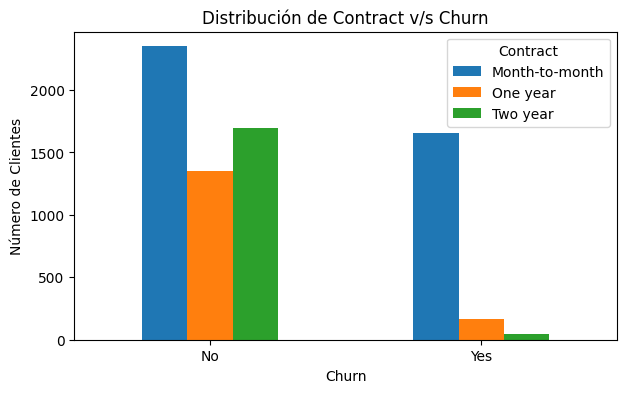

In [ ]:
# Grafico 1: Muestra la distribución de tipos de contrato DENTRO de cada categoría de Churn.
# Útil para comparar cuántos clientes con cada tipo de contrato hay en el grupo que churned
tabla = pd.crosstab(telecom_flat['Churn'], telecom_flat['Contract'])
tabla.plot(kind='bar', figsize=(7,4))
plt.title('Distribución de Contract v/s Churn')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0) # Mantener las etiquetas del eje X horizontales
plt.show()

####Grafico 2 :Churn v/s Contrato

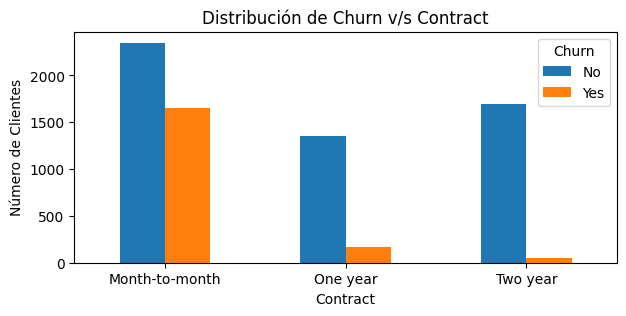

In [ ]:
# Grafico 2: Muestra la distribución de Churn DENTRO de cada tipo de Contrato.
# Útil para comparar cuántos clientes de un TIPO DE CONTRATO específico churnearon
tabla = pd.crosstab(telecom_flat['Contract'], telecom_flat['Churn'])
tabla.plot(kind='bar', figsize=(7,3))
plt.title('Distribución de Churn v/s Contract')
plt.xlabel('Contract')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0) # Mantener las etiquetas del eje X horizontales
plt.show()

####Grafico 3 :Churn v/s PaperlessBilling

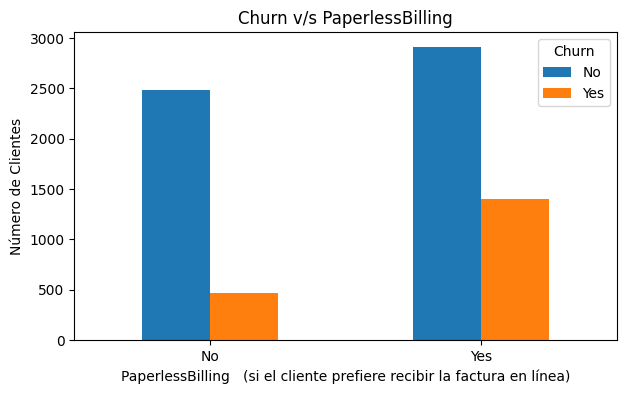


Churn por PaperlessBilling (%):
Churn                 No     Yes
PaperlessBilling                
No                84.13%  15.87%
Yes               67.52%  32.48%


In [ ]:
# Grafico de barras para Churn vs PaperlessBilling
# Muestra cuántos clientes con y sin factura electrónica abandonaron vs no abandonaron.
tabla_paperless = pd.crosstab(telecom_flat['PaperlessBilling'], telecom_flat['Churn'])
tabla_paperless.plot(kind='bar', figsize=(7, 4))
plt.title('Churn v/s PaperlessBilling')
plt.xlabel('PaperlessBilling   (si el cliente prefiere recibir la factura en línea)')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0)
plt.show()
# Tabla cruzada normalizada para ver las proporciones/porcentajes
print("\nChurn por PaperlessBilling (%):")
tabla_paperless_pct = pd.crosstab(telecom_flat['PaperlessBilling'], telecom_flat['Churn'], normalize='index') * 100
print(tabla_paperless_pct.round(2).astype(str) + '%')

#### Grafico 4: Chrun v/s gender

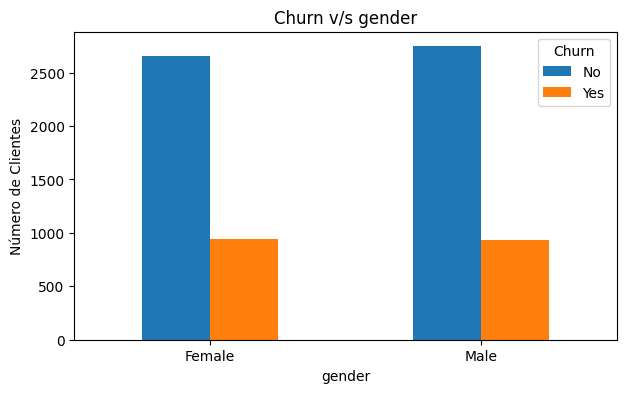


Churn por gender (%):
Churn       No     Yes
gender                
Female  73.86%  26.14%
Male    74.69%  25.31%


In [ ]:
# Grafico de barras para Chrun v/s gender
# Muestra cuántos clientes por gender abandonaron vs no abandonaron.
tabla_paperless = pd.crosstab(telecom_flat['gender'], telecom_flat['Churn'])
tabla_paperless.plot(kind='bar', figsize=(7, 4))
plt.title('Churn v/s gender')
plt.xlabel('gender')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0)
plt.show()
# Tabla cruzada normalizada para ver las proporciones/porcentajes
print("\nChurn por gender (%):")
tabla_paperless_pct = pd.crosstab(telecom_flat['gender'], telecom_flat['Churn'], normalize='index') * 100
print(tabla_paperless_pct.round(2).astype(str) + '%')

#### Grafico 5 Churn vs PaymentMethod

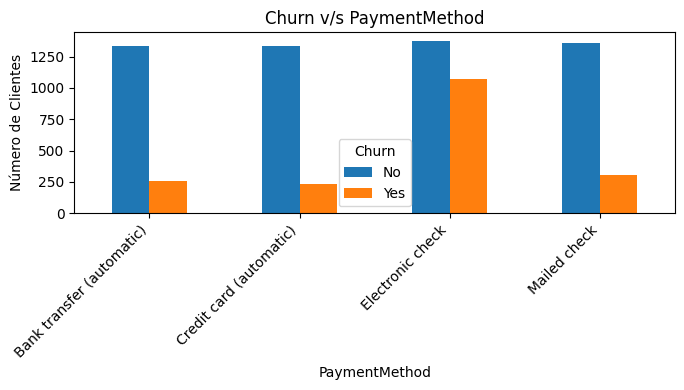


Churn por PaymentMethod (%):
Churn                          No     Yes
PaymentMethod                            
Bank transfer (automatic)  83.76%  16.24%
Credit card (automatic)     85.2%   14.8%
Electronic check            56.2%   43.8%
Mailed check                81.5%   18.5%


In [ ]:
# Grafico 5 Churn vs PaymentMethod
# Muestra cuántos clientes por metodo de pago abandonaron vs no abandonaron.
tabla_paperless = pd.crosstab(telecom_flat['PaymentMethod'], telecom_flat['Churn'])
tabla_paperless.plot(kind='bar', figsize=(7,4)) # Aumenta el tamaño de la figura si es necesario
plt.title('Churn v/s PaymentMethod')
plt.xlabel('PaymentMethod')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45, ha='right') # Rotar las etiquetas 45 grados y alinearlas a la derecha
plt.tight_layout() # Ajustar automáticamente los parámetros del gráfico para evitar la superposición
plt.show()
# Tabla cruzada normalizada para ver las proporciones/porcentajes
print("\nChurn por PaymentMethod (%):")
tabla_paperless_pct = pd.crosstab(telecom_flat['PaymentMethod'], telecom_flat['Churn'], normalize='index') * 100
print(tabla_paperless_pct.round(2).astype(str) + '%')

#**4.INFORME FINAL**


El presente informe analiza los datos de clientes de Telecom X con el objetivo de identificar los factores clave que contribuyen al "`churn`" o abandono de los clientes. Comprender estas razones es fundamental para desarrollar estrategias efectivas de retención y adquisición de clientes.

**Analisis Descriptivo y Tablas Cruzadas:**

Los datos muestran una clara relación entre el tipo de contrato, el metodo de pago y la tasa de abandono:

*`Churn v/s Contract:` Los clientes con contratos a corto plazo (Month-to-month) presentan una tasa de abandono significativamente mayor en comparación con aquellos con contratos a largo plazo (`One year `y `Two year`). Esto sugiere que la falta de compromiso a largo plazo esta fuertemente relacionada con la propensi—n a abandonar el servicio.

*`Churn v/s PaymentMethod`: Los métodos de pago electrónico (`Electronic check`) muestran una tasa de abandono superior a otros métodos como el cheque postal, la transferencia bancaria o la tarjeta de crédito. Esto podría indicar una menor fidelidad entre los usuarios de este método de pago o quizas problemas asociados a la experiencia de pago electrónico.

*`Churn v/s PaperlessBilling`: Los clientes que optan por la facturación electr—nica (Yes) parecen tener una tasa de abandono ligeramente mayor que aquellos que no (No). Aunque la diferencia no es tan marcada como en el tipo de contrato, podría ser un factor a considerar.

*`Churn v/s gender`: El análisis por género no revela una diferencia significativa en la tasa de abandono entre hombres y mujeres. Esto sugiere que el género por sí solo no es un predictor fuerte de abandono en este conjunto de datos.


**Distribución de Abandono por Variables Clave:**

Los gráficos confirman las observaciones de las tablas cruzadas:

*Los gráficos de barras de "`Contract v/s Churn`" y "`Churn v/s Contract`" visualizan claramente la alta proporción de abandono entre los clientes con contratos mensuales.

*El gráfico de "`Churn v/s PaperlessBilling`" muestra la ligera tendencia de mayor abandono entre los usuarios de facturación electrónica.

*El gráfico de "`Churn v/s gender`" refuerza la conclusión de que el género no es un factor determinante en el abandono.

El gráfico de "`Churn v/s PaymentMethod`" destaca la diferencia en la tasa de abandono entre los métodos de pago, con el cheque electrónico mostrando una proporción más alta.

**Estadísticas Descriptivas:**

`tenure` (meses de contrato): Las estadísticas descriptivas de "`tenure`" (meses de contrato) pueden proporcionar información sobre la duración promedio de la permanencia de los clientes, la dispersión de estos valores, y la presencia de clientes de muy corta o muy larga duración. Un bajo promedio de "tenure" para los clientes que abandonan reforzaria la idea de que el abandono ocurre pronto en el ciclo de vida del cliente.

`Charges.Monthly` (cargos mensuales): Las estadísticas de "Charges.Monthly" (cargos mensuales) pueden mostrar si los clientes que abandonan tienen cargos mensuales significativamente diferentes a los que permanecen. Por ejemplo, si los clientes con cargos mensuales muy altos o muy bajos tienen una mayor tendencia a abandonar.

**Razones Clave de Abandono en Telecom X:**

Basado en este análisis, las principales razones de abandono parecen estar relacionadas con:

*Falta de Compromiso a Largo Plazo: Los contratos mensuales son un factor de riesgo significativo para el abandono.

*Método de Pago: El uso del cheque electrónico como método de pago está asociado con una mayor propensión a abandonar.

*Posibles Problemas con la Experiencia del Cliente: Si bien no se analiza directamente en este código, la relación entre facturación electrónica y abandono podría sugerir problemas con la plataforma de facturación en línea o la comunicación.

*Corta Permanencia (posiblemente): Las estadísticas de "tenure" probablemente mostrarán que los clientes que abandonan tienen una duración de contrato más corta.

*Posible Relación con Cargos Mensuales: Podría existir una relación entre los cargos mensuales y el abandono, lo cual requeriría un análisis más profundo.
Estrategia Propuesta para Evitar el Abandono y Captar Nuevos Clientes:

Considerando los hallazgos, se proponen las siguientes estrategias:

**Incentivar Contratos a Largo Plazo:**

*Ofrecer descuentos significativos o beneficios adicionales (ej. datos extra, servicios premium) a los clientes que firmen contratos de uno o dos años.
Comunicar claramente las ventajas y el ahorro de los contratos a largo plazo frente a los mensuales.

*Simplificar el proceso de cambio de un contrato mensual a uno a largo plazo.
Mejorar la Experiencia del Cliente con el Cheque Electrónico:

*Investigar las posibles razones detrás del mayor abandono entre los usuarios de cheque electrónico (ej. problemas técnicos, procesos confusos, falta de confianza).

*Optimizar la plataforma de pago electrónico para que sea más intuitiva y confiable.


*Considerar la posibilidad de ofrecer incentivos para utilizar otros métodos de pago más estables.


**Optimizar la Experiencia de Facturación Electrónica:**

*Recopilar feedback de los usuarios de facturación electrónica para identificar posibles puntos de fricción o insatisfacción.

*Asegurar que la plataforma de facturación en línea sea fácil de usar, accesible y que proporcione información clara sobre los cargos.

*Mejorar la comunicación relacionada con la facturación electrónica para evitar confusiones.

**Estrategias de Retención Temprana:**

*Implementar programas de onboarding efectivos para nuevos clientes, especialmente aquellos con contratos mensuales, para asegurar que comprendan los servicios y se sientan valorados desde el principio.

*Monitorear de cerca a los clientes con baja "tenure" para identificar señales de insatisfacción y tomar medidas proactivas de retención.

*Ofrecer incentivos o "check-ins" periodicos a los clientes durante los primeros meses para asegurar su satisfacción.
Segmentación de Clientes y Ofertas Personalizadas:

*Utilizar los datos para segmentar a los clientes en función de su riesgo de abandono (ej. clientes con contrato mensual, usando cheque electrónico, con baja "tenure").

*Desarrollar campañas de retención personalizadas para cada segmento, ofreciendo soluciones adaptadas a sus necesidades y puntos debiles.


**Captación de Nuevos Clientes Basada en Clientes Existentes Satisfechos:**

*Implementar un programa de referidos donde los clientes actuales reciban recompensas por traer nuevos clientes.

*Destacar los beneficios de los contratos a largo plazo y la estabilidad del servicio en las campañas de marketing para atraer a clientes que buscan compromiso.

*Utilizar testimonios y casos de éxito de clientes satisfechos en las comunicaciones de marketing.


**Conclusión:**

El análisis de los datos de Telecom X revela que el tipo de contrato y el método de pago son factores cruciales en la determinación del abandono de clientes. Al centrarse en incentivar contratos a largo plazo, mejorar la experiencia de pago electrónico y de facturación, e implementar estrategias de retención tempranas y personalizadas, Telecom X puede reducir significativamente su tasa de abandono y fortalecer su base de clientes, lo que a su vez facilitara la captación de nuevos clientes.




